In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import re
#import nltk
#import string
#from nltk.corpus import *
#from wordcloud import *
from sklearn import *
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#from sklearn.decomposition import *
#from sklearn.tree import *
#from sklearn.feature_extraction.text import *
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import *
#from sklearn.metrics import *
#%matplotlib inline

In [170]:
sns.set()

In [171]:
student_data = pd.read_csv('./student-mat.csv')
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [172]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [173]:
student_data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_10832\1809258949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  student_data.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [174]:
best_features=['failures', 'G1', 'G2']

<AxesSubplot: >

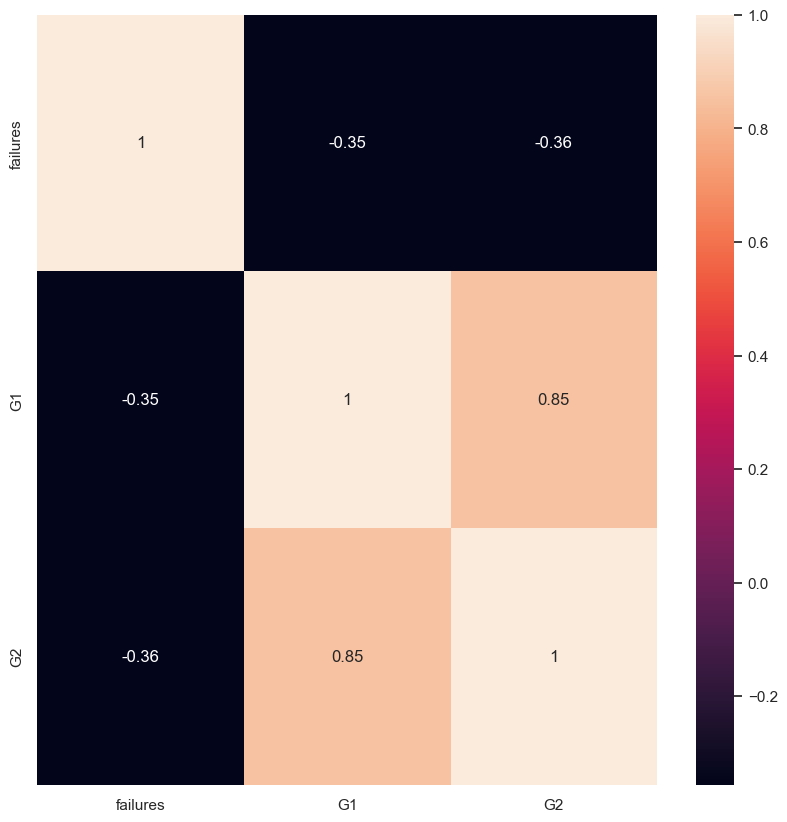

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(student_data[best_features].corr(),annot=True,cbar=True)

In [176]:
X=student_data[best_features]
Y=student_data['G3']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.1,random_state=20,shuffle=True)

In [177]:
model = LinearRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(f'Accuracy: {round(r2_score(Y_test , pred),3)*100}%')

Accuracy: 94.3%


In [178]:
Y_test = Y_test.tolist()
pred = pred.tolist()

In [179]:
for i in range(len(Y_test)):
    print(Y_test[i], round(pred[i], 2))


9 7.64
8 7.35
8 7.16
9 8.62
10 9.31
9 8.76
14 14.24
15 13.81
11 9.6
8 6.87
0 -0.49
11 9.6
14 12.68
7 6.22
20 19.72
18 18.45
16 15.08
16 15.51
9 8.47
15 15.08
14 12.97
16 15.22
12 10.87
9 8.62
6 4.12
9 7.64
18 18.45
13 12.14
11 11.85
17 16.35
10 8.76
15 15.08
9 9.6
14 13.66
0 3.93
19 18.6
8 8.18
10 9.6
15 15.22
10 8.33


[[0, 10, 8], [0, 8, 8], [1, 8, 8], [0, 10, 9], [0, 8, 10], [0, 11, 9], [0, 15, 14], [0, 12, 14], [0, 10, 10], [1, 6, 8], [0, 8, 0], [0, 10, 10], [0, 11, 13], [0, 7, 7], [0, 19, 19], [0, 17, 18], [0, 14, 15], [0, 17, 15], [0, 9, 9], [0, 14, 15], [0, 13, 13], [0, 15, 15], [0, 12, 11], [0, 10, 9], [0, 6, 5], [0, 10, 8], [0, 17, 18], [0, 14, 12], [0, 12, 12], [0, 16, 16], [0, 11, 9], [0, 14, 15], [0, 10, 10], [0, 11, 14], [1, 6, 5], [0, 18, 18], [0, 7, 9], [0, 10, 10], [0, 15, 15], [0, 8, 9]]


In [208]:
# print(X_test)
import joblib
cls = joblib.load('./saved_model.sav')

lis = [0, 12, 15]
data_array = np.asarray(lis)
arr= data_array.reshape(1,-1)
ans = cls.predict(arr)
print(ans)

[15]


C:\Users\user\anaconda3\envs\student_score_prediction\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
